## EDA:

* What were the review counts by year? 

* What were the review counts by Rating?

* What are the monthly review counts over time? Consider total reviews and reviews by rating.

* What are the top 30 words used in 5 star ratings?

* What are the top 30 words used in 2 and 1 star ratings?

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

%matplotlib inline

In [2]:
# Functions
def show_bar_plot(my_data, my_figsize, my_color, my_titletext, my_xlabeltext, my_ylabeltext, rowcount_for_percent=0):
    my_data.plot.bar(fontsize=12, rot=0, alpha=0.85, figsize=my_figsize, color=my_color)
    plt.title(my_titletext, size='14')
    plt.xlabel(my_xlabeltext, size='12')
    plt.ylabel(my_ylabeltext, size='12')
    plt.yticks(size=12)
    bar_labels = my_data.values
  
    for i in range(len(my_data.values)):
        the_bar_label = bar_labels[i]
        if rowcount_for_percent > 0:
            the_bar_label = get_pretty_percent(bar_labels[i], rowcount_for_percent) 
        plt.text(x=i, y=bar_labels[i], s=the_bar_label, size=12, rotation=0, color='black', ha='center', va='bottom')
    plt.show()


def get_pretty_percent(x, y):
    percentage = round(x/y, 3)
    return "{:.1%}".format(percentage)

In [3]:
# Read in the data
reviews_df = pd.read_csv('../data/prepped_reviews.csv')

In [4]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1500 non-null   object
 1   star_rating      1500 non-null   object
 2   country          1500 non-null   object
 3   datetime         1500 non-null   object
 4   content          1500 non-null   object
 5   reviewYear       1500 non-null   int64 
 6   reviewYearMonth  1500 non-null   object
 7   rating           1500 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 93.9+ KB


In [5]:
# min and max year for Review - Assuming time is in GMT. Verify this if possible.
print(f"Min review time: {reviews_df['datetime'].min()}")
print(f"Max review time: {reviews_df['datetime'].max()}")

Min review time: 2020-02-04 10:46:46+00:00
Max review time: 2021-06-21 07:42:01+00:00



### Question: What were the review counts by year? 

### Answer: Counts are below. It is interesting to note that 2021 has almost 4 times the number of reviews submitted over the entire year of 2020. 2021 reviews only cover 6 months. 

2


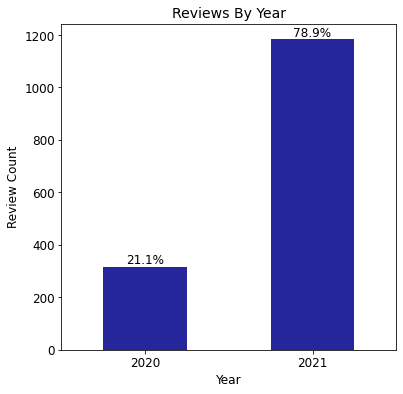

In [6]:
by_year = reviews_df.groupby(['reviewYear'])['id'].count()
by_year.sort_index()
print(len(by_year))

show_bar_plot(my_data=by_year, 
              my_figsize=(6,6), 
              my_color='darkblue', 
              my_titletext='Reviews By Year', 
              my_xlabeltext='Year',
              my_ylabeltext='Review Count',
              rowcount_for_percent=reviews_df.shape[0]
              )


### Question: What were the review counts by Rating?

### Answer: 
* 67.5% of reviews were 5 star reviews.
* 16.9% of reviews were "mid-range" at 4,3,or 2.
* 15.6% of reviews were 1 star reviews.

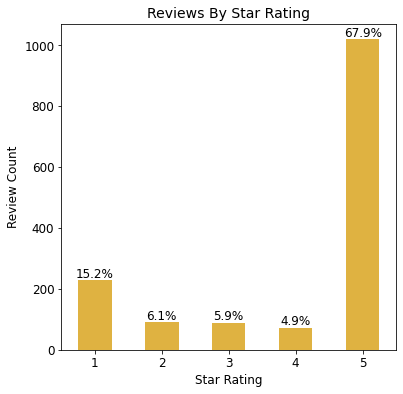

In [7]:
by_rating = reviews_df.groupby(['rating'])['id'].count()
by_rating.sort_index()

show_bar_plot(my_data=by_rating, 
              my_figsize=(6,6), 
              my_color='goldenrod', 
              my_titletext='Reviews By Star Rating', 
              my_xlabeltext='Star Rating',
              my_ylabeltext='Review Count',
              rowcount_for_percent=reviews_df.shape[0])

In [8]:
by_location = reviews_df.groupby(['country'])['id'].count()
by_location.sort_values()


country
AE      1
IN      1
LT      1
PE      1
HU      1
HR      1
PH      1
GT      1
PK      1
IT      1
VN      1
SA      1
SE      1
SI      1
TR      1
BA      1
TW      1
VE      1
FI      1
TT      2
QA      2
JE      2
DE      2
AT      2
IL      2
ES      2
FR      2
HK      2
MX      3
NO      3
MY      3
ZA      3
SG      4
CH      5
BE      5
IE      9
NL     10
AU     10
CA     19
GB    443
US    946
Name: id, dtype: int64

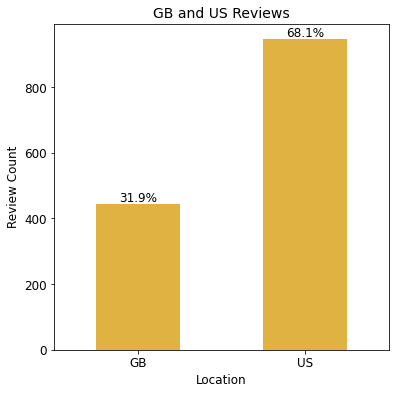

In [9]:
gb_and_us_reviews = reviews_df[reviews_df['country'].isin(['GB','US'])]
by_primary_locations = gb_and_us_reviews.groupby(['country'])['id'].count()
by_primary_locations.sort_values()

show_bar_plot(my_data=by_primary_locations, 
              my_figsize=(6,6), 
              my_color='goldenrod', 
              my_titletext='GB and US Reviews', 
              my_xlabeltext='Location',
              my_ylabeltext='Review Count',
              rowcount_for_percent=gb_and_us_reviews.shape[0])

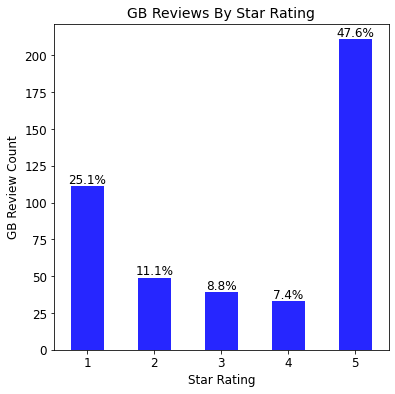

In [10]:
gb_reviews = reviews_df[reviews_df['country'] =='GB']
gb_ratings = gb_reviews.groupby(['rating'])['id'].count()
gb_ratings.sort_index()

show_bar_plot(my_data=gb_ratings, 
              my_figsize=(6,6), 
              my_color='blue', 
              my_titletext='GB Reviews By Star Rating', 
              my_xlabeltext='Star Rating',
              my_ylabeltext='GB Review Count',
              rowcount_for_percent=gb_reviews.shape[0])


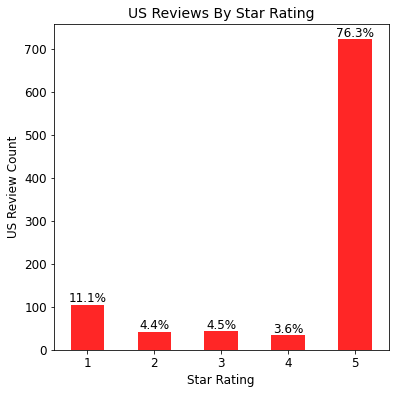

In [11]:
us_reviews = reviews_df[reviews_df['country'] =='US']
us_ratings = us_reviews.groupby(['rating'])['id'].count()


show_bar_plot(my_data=us_ratings, 
              my_figsize=(6,6), 
              my_color='red', 
              my_titletext='US Reviews By Star Rating', 
              my_xlabeltext='Star Rating',
              my_ylabeltext='US Review Count',
              rowcount_for_percent=us_reviews.shape[0])

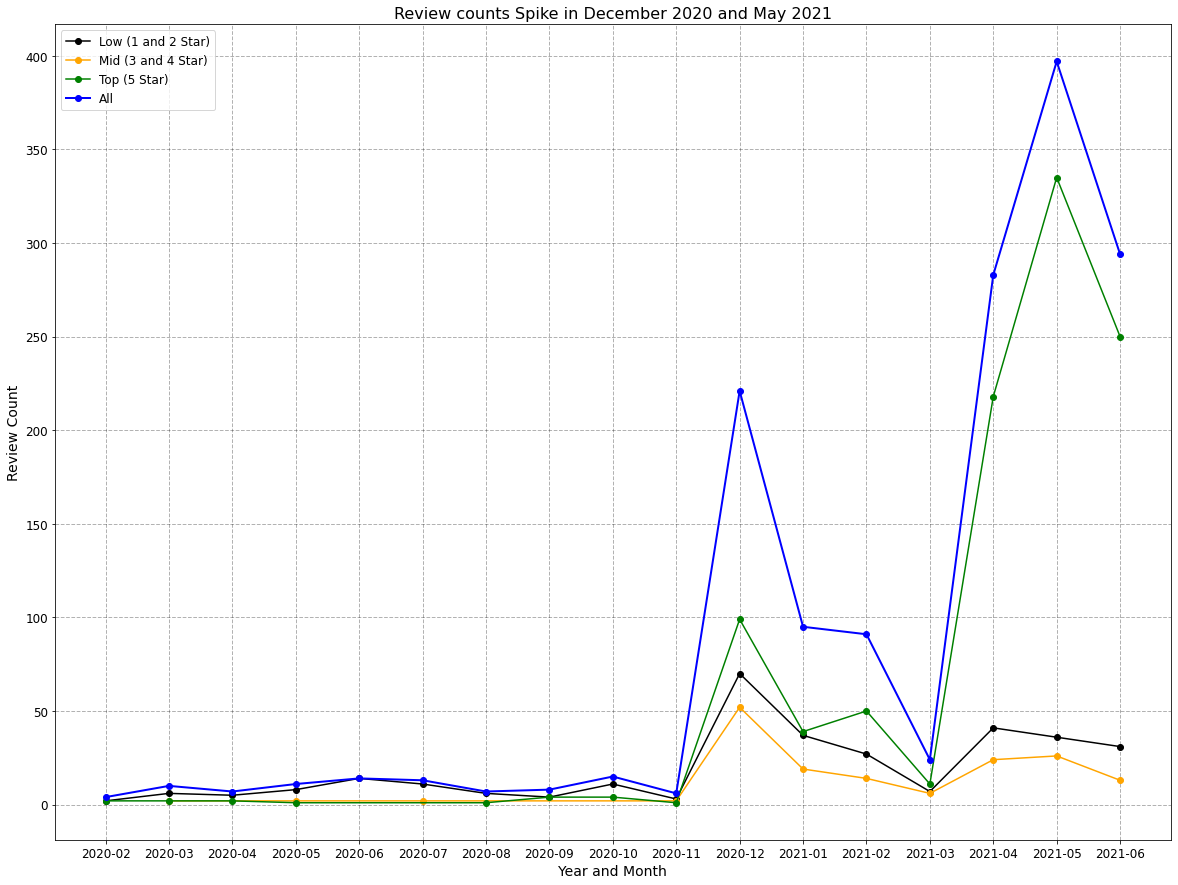

In [107]:
low_reviews_by_ym = reviews_df[reviews_df['rating'].isin([2,1])].groupby(['reviewYearMonth'])['id'].count()
mid_reviews_by_ym = reviews_df[reviews_df['rating'].isin([3,4])].groupby(['reviewYearMonth'])['id'].count()
top_reviews_by_ym = reviews_df[reviews_df['rating'] == 5].groupby(['reviewYearMonth'])['id'].count()
all_reviews_by_ym = reviews_df.groupby(['reviewYearMonth'])['id'].count()


plt.rc('font', size=14) #controls default text size
plt.rc('axes', titlesize=16) #fontsize of the title
plt.rc('axes', labelsize=14) #fontsize of the x and y labels
plt.rc('xtick', labelsize=12) #fontsize of the x tick labels
plt.rc('ytick', labelsize=12) #fontsize of the y tick labels
plt.rc('legend', fontsize=12) #fontsize of the legend

plt.figure(figsize=(20, 15))
plt.plot(low_reviews_by_ym.index, low_reviews_by_ym, color='black', linewidth=1.5, marker='o', linestyle='solid')
plt.plot(mid_reviews_by_ym.index, mid_reviews_by_ym, color='orange', linewidth=1.5, marker='o', linestyle='solid')
plt.plot(top_reviews_by_ym.index, top_reviews_by_ym, color='green', linewidth=1.5, marker='o', linestyle='solid')
plt.plot(all_reviews_by_ym.index, all_reviews_by_ym, color='blue', linewidth=2.0, marker='o', linestyle='solid')
#plt.xticks(rotation=15)
plt.grid(color = 'black', alpha = 0.3, linestyle = '--', linewidth = 1)

plt.title('Review counts Spike in December 2020 and May 2021')
plt.xlabel('Year and Month')
plt.ylabel('Review Count')
plt.legend(['Low (1 and 2 Star)','Mid (3 and 4 Star)', 'Top (5 Star)', 'All'], loc=2)

plt.show()

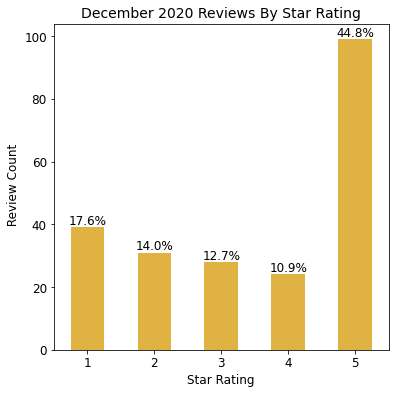

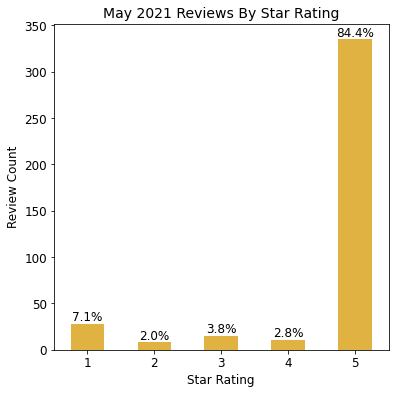

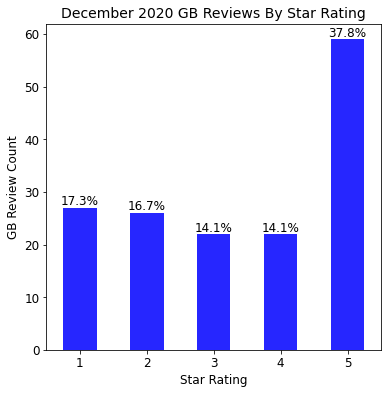

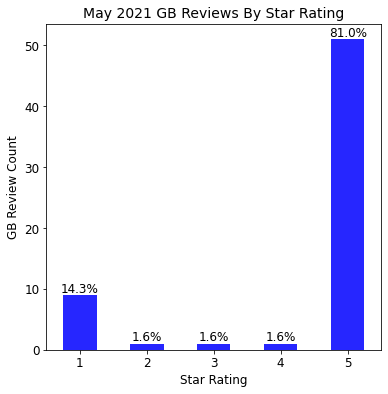

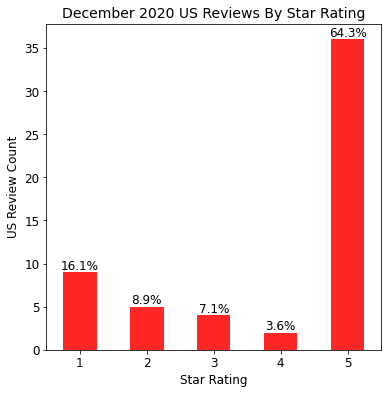

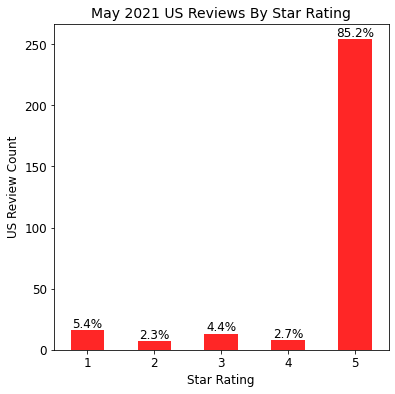

In [13]:
# Examine the December 2020 and May 2021 review spikes. Focus in on GB and US reviews

# All countries
reviews_dec2020 = reviews_df[(reviews_df['reviewYearMonth'] == '2020-12')]
ratings_dec2020 = reviews_dec2020.groupby(['rating'])['id'].count()

show_bar_plot(my_data=ratings_dec2020, 
              my_figsize=(6,6), 
              my_color='goldenrod', 
              my_titletext='December 2020 Reviews By Star Rating', 
              my_xlabeltext='Star Rating',
              my_ylabeltext=' Review Count',
              rowcount_for_percent=reviews_dec2020.shape[0])

reviews_may2020 = reviews_df[(reviews_df['reviewYearMonth'] == '2021-05')]
ratings_may2021 = reviews_may2020.groupby(['rating'])['id'].count()

show_bar_plot(my_data=ratings_may2021, 
              my_figsize=(6,6), 
              my_color='goldenrod', 
              my_titletext='May 2021 Reviews By Star Rating', 
              my_xlabeltext='Star Rating',
              my_ylabeltext='Review Count',
              rowcount_for_percent=reviews_may2020.shape[0])
            

# GB
gb_reviews_dec2020 = reviews_df[(reviews_df['reviewYearMonth'] == '2020-12') & (reviews_df['country'] == 'GB')]
gb_ratings_dec2020 = gb_reviews_dec2020.groupby(['rating'])['id'].count()

show_bar_plot(my_data=gb_ratings_dec2020, 
              my_figsize=(6,6), 
              my_color='blue', 
              my_titletext='December 2020 GB Reviews By Star Rating', 
              my_xlabeltext='Star Rating',
              my_ylabeltext='GB Review Count',
              rowcount_for_percent=gb_reviews_dec2020.shape[0])

gb_reviews_may2020 = reviews_df[(reviews_df['reviewYearMonth'] == '2021-05') & (reviews_df['country'] == 'GB')]
gb_ratings_may2021 = gb_reviews_may2020.groupby(['rating'])['id'].count()

show_bar_plot(my_data=gb_ratings_may2021, 
              my_figsize=(6,6), 
              my_color='blue', 
              my_titletext='May 2021 GB Reviews By Star Rating', 
              my_xlabeltext='Star Rating',
              my_ylabeltext='GB Review Count',
              rowcount_for_percent=gb_reviews_may2020.shape[0])


# US
us_reviews_dec2020 = reviews_df[(reviews_df['reviewYearMonth'] == '2020-12') & (reviews_df['country'] == 'US')]
us_ratings_dec2020 = us_reviews_dec2020.groupby(['rating'])['id'].count()

show_bar_plot(my_data=us_ratings_dec2020, 
              my_figsize=(6,6), 
              my_color='red', 
              my_titletext='December 2020 US Reviews By Star Rating', 
              my_xlabeltext='Star Rating',
              my_ylabeltext='US Review Count',
              rowcount_for_percent=us_reviews_dec2020.shape[0])

us_reviews_may2020 = reviews_df[(reviews_df['reviewYearMonth'] == '2021-05') & (reviews_df['country'] == 'US')]
us_ratings_may2021 = us_reviews_may2020.groupby(['rating'])['id'].count()

show_bar_plot(my_data=us_ratings_may2021, 
              my_figsize=(6,6), 
              my_color='red', 
              my_titletext='May 2021 US Reviews By Star Rating', 
              my_xlabeltext='Star Rating',
              my_ylabeltext='US Review Count',
              rowcount_for_percent=us_reviews_may2020.shape[0])

## Text Analysis
### For the two "Review Spikes", what were the most frequently used words (and bi-grams) in High, Mid, and Low Rated Reviews?


In [146]:
from wordcloud import WordCloud, STOPWORDS

def join_all_reviews(content_series):
    all_reviews = " ".join(review.lower() for review in content_series)
    return all_reviews

def plot_wordcloud(text, word_max, bg_color='white', cm='ocean'):
    ''' Plot a word cloud from the given text. '''
    my_stopwords = set(STOPWORDS)
    my_stopwords.add('elvie')

    cloud = WordCloud(min_word_length=3,
                      background_color=bg_color,
                      max_words=word_max,
                      max_font_size=80,
                      min_font_size=10,
                      stopwords=my_stopwords,
                      collocation_threshold = 4,
                      colormap=cm).generate(text)
    
    # plot it
    plt.figure(figsize=(15,10))
    plt.imshow(cloud, interpolation='bilinear') 
    plt.axis("off")
    plt.show()


In [127]:
# Get the reviews for those two "spike" months. Get the reviews for Top, Mid, and Low star ratings.
review_spikes_df = reviews_df[(reviews_df['reviewYearMonth'] == '2020-12') | (reviews_df['reviewYearMonth'] == '2021-06')]
review_spikes_top_series = review_spikes_df[review_spikes_df['rating'] == 5]['content']
review_spikes_mid_series = review_spikes_df[review_spikes_df['rating'].isin([3,4])]['content']
review_spikes_low_series = review_spikes_df[review_spikes_df['rating'].isin([2,1])]['content']

top_rated_review_words = join_all_reviews(content_series=review_spikes_top_series)
mid_rated_review_words = join_all_reviews(content_series=review_spikes_mid_series)
low_rated_review_words = join_all_reviews(content_series=review_spikes_low_series)

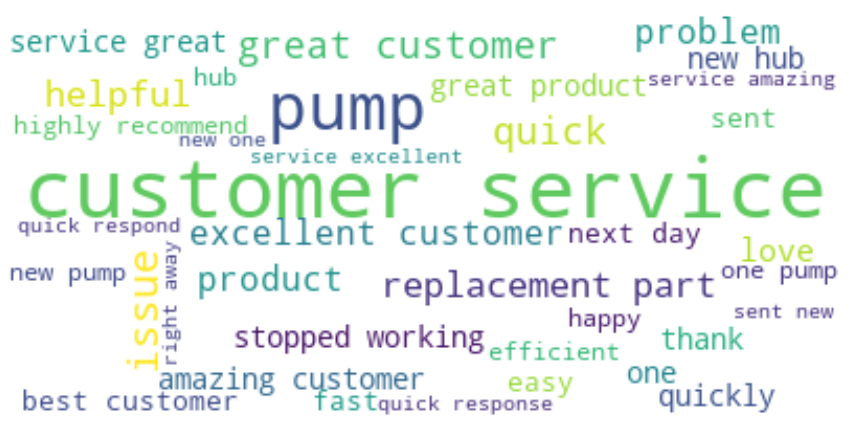

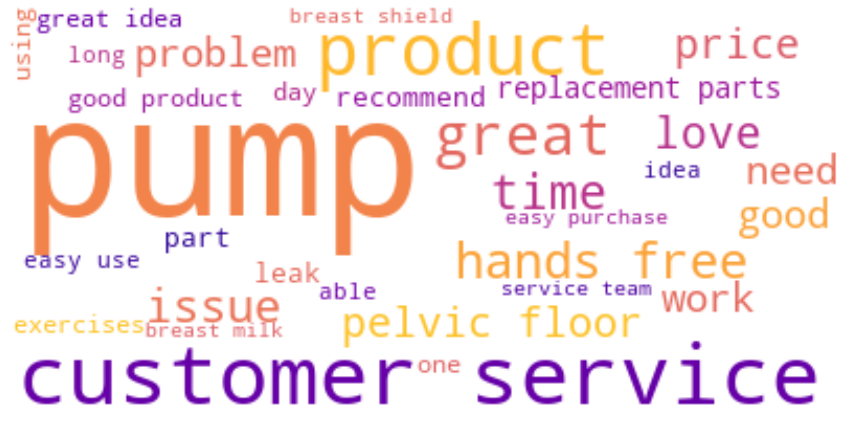

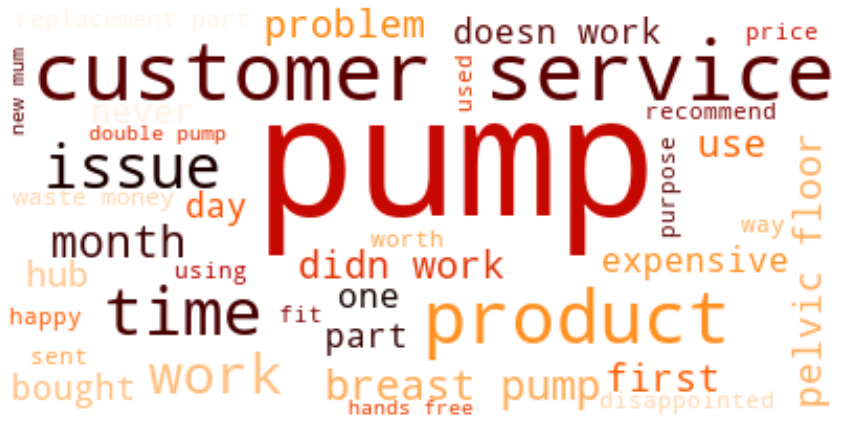

In [149]:
# Create word clouds of the most common words in Top (5 star), Mid (4-3 star) and Low (2-1 star) Reviews.
plot_wordcloud(text=top_rated_review_words, word_max=50, cm='viridis', bg_color='white')
plot_wordcloud(text=mid_rated_review_words, word_max=50, cm='plasma', bg_color='white')
plot_wordcloud(text=low_rated_review_words, word_max=50, cm='gist_heat', bg_color='white')